In [1]:
"""
Notebook to study the performance of CEBRA with the two available distance metrics: cosine and euclidean. 
NB: For euclidean distance metric is advisable to use a model architecture that uses MSE (Mean-squared error)loss instead of the standard NCE (Noise Contrastive Loss) loss CEBRA uses.
"""

'\nNotebook to study the performance of CEBRA with the two available distance metrics: cosine and euclidean. \nNB: For euclidean distance metric is advisable to use a model architecture that uses MSE (Mean-squared error)loss instead of the standard NCE (Noise Contrastive Loss) loss CEBRA uses.\n'

In [1]:
import sys
import os # my addtion

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import cebra.data
import torch
import cebra.integrations
import cebra.datasets
from cebra import CEBRA
import torch
import pickle
import seaborn as sns

from matplotlib.collections import LineCollection
import pandas as pd

In [2]:
df_all_sessions_parallel = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/stats_files/all_session_stats.pkl', "rb"))

In [3]:
df_all_sessions_parallel.describe()

,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC,ses_idx_count
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.991384,0.949492,0.932932,0.836161,0.878236,0.851472,0.978290,11.037915
std,0.010217,0.051407,0.076378,0.093957,0.078095,0.078867,0.024984,7.985015
min,0.927228,0.707457,0.670134,0.500000,0.500000,0.627279,0.814518,1.000000
25%,0.989181,0.939384,0.918279,0.781315,0.836697,0.798813,0.973110,4.000000
50%,0.994087,0.965686,0.964703,0.859601,0.890428,0.844594,0.986376,10.000000
75%,0.996856,0.980459,0.980183,0.899399,0.937897,0.901217,0.993002,16.000000
max,1.000000,1.000000,1.000000,0.979371,1.000000,1.000000,1.000000,34.000000


In [4]:
df_cos_sessions = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/stats_files/all_session_stats(cosine).pkl', "rb"))

In [5]:
df_cos_sessions.describe()

,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC,ses_idx_count
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.988570,0.967103,0.942976,0.850295,0.857515,0.913037,0.984996,11.037915
std,0.023499,0.048196,0.094329,0.128836,0.149649,0.052262,0.014164,7.985015
min,0.679612,0.500000,0.500000,0.500000,0.500000,0.500000,0.917773,1.000000
25%,0.987033,0.963229,0.950245,0.810379,0.823220,0.901876,0.979020,4.000000
50%,0.992695,0.980932,0.978448,0.904654,0.922482,0.926078,0.989454,10.000000
75%,0.996371,0.989089,0.990168,0.936123,0.957906,0.942320,0.994915,16.000000
max,1.000000,1.000000,1.000000,0.981258,0.994771,1.000000,1.000000,34.000000


Text(0.5, 1.0, 'Comparing CEBRA performance using different distance metrics for the embedding space')

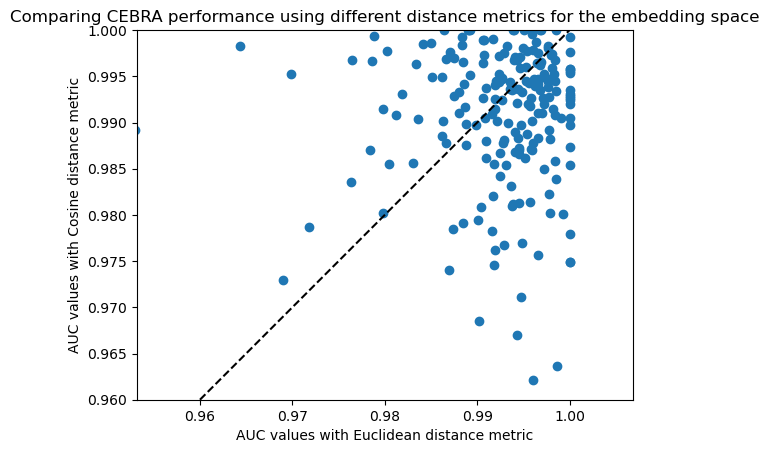

In [6]:
ax = plt.gca()
ax.axis('equal')
ax.plot(df_all_sessions_parallel['all4_AUC'],df_cos_sessions['all4_AUC'], 'o')
ax.plot([0.96,1],[0.96,1],'k--')
ax.set_ybound(0.96,1)
ax.set_xbound(0.96,1)
ax.set_xlabel("AUC values with Euclidean distance metric")
ax.set_ylabel("AUC values with Cosine distance metric")
ax.set_title("Comparing CEBRA performance using different distance metrics for the embedding space")

In [7]:
diff = df_cos_sessions['all4_AUC'] - df_all_sessions_parallel['all4_AUC']

Text(0.5, 1.0, 'Error on AUC values from same session embeddings with different distance metrics ')

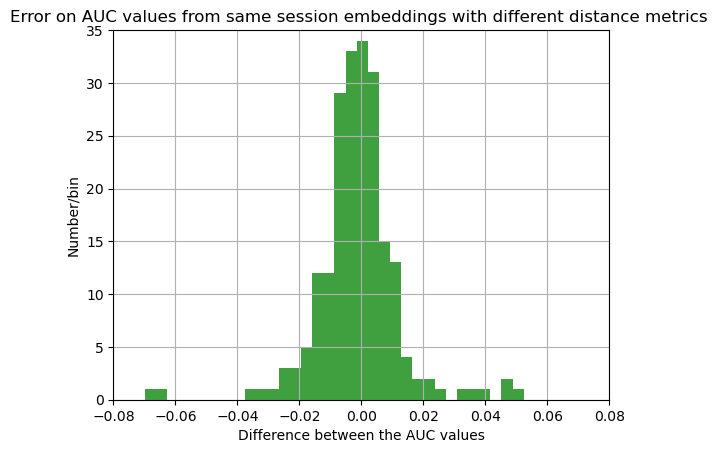

In [8]:
n, bins, patches = plt.hist(diff, 100, facecolor='green',alpha=0.75)
plt.xlabel('Difference between the AUC values')
plt.ylabel('Number/bin')
plt.axis([-0.08, 0.08, 0, 35])
plt.grid(True)
plt.title("Error on AUC values from same session embeddings with different distance metrics ")

This small analysis shows that the two distance metrics we can use with CEBRA: euclidean and cosine have similar performance on our data so far.